In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset into a dataframe and retrieve general info of the new dataframe

In [88]:
df = pd.read_csv("/Users/mahinbindra/Downloads/Group Project Data-SFD Data-Toronto Police copy.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

# 2. Drop columns that are not necessary to the analysis

In [89]:
df.drop(columns=["X", "Y", "OCC_DOY", "LONG_WGS84", "LAT_WGS84"], inplace=True)

In [90]:
df

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137)
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1)
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24)
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75)
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53)
5703,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77)
5704,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135)
5705,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83)


# 3. Remove NSA values present in the dataset and assigned the updated dataset to a new dataframe called df2

In [91]:
df2 = df[df != 'NSA']
df2.dropna(inplace=True)
df2.isna().any().any()

False

In [92]:
df2


,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137)
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1)
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24)
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75)
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53)
5703,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77)
5704,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135)
5705,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83)


# 4. Grouped crimes occurences by neighborhood

In [93]:
crimes_by_neighbourhoods = df2.groupby(["NEIGHBOURHOOD_158"])[["EVENT_UNIQUE_ID"]].count().sort_values(by = ["EVENT_UNIQUE_ID"], ascending=False).reset_index()
crimes_by_neighbourhoods.rename(columns={'EVENT_UNIQUE_ID': 'TOTAL CRIMES'}, inplace=True)
crimes_by_neighbourhoods

,NEIGHBOURHOOD_158,TOTAL CRIMES
0,Glenfield-Jane Heights,311
1,Black Creek,203
2,Mount Olive-Silverstone-Jamestown,192
3,West Humber-Clairville,132
4,York University Heights,117
...,...,...
153,Forest Hill North,3
154,Kingsway South,2
155,Lawrence Park South,1
156,Lawrence Park North,1


# 5. Identified the 25th percentile and the 75th percentile of the crimes by neighborhood. Neighborhoods in the 75th percentile are classified as high crime rate neighboorhoods and neighborhoods with a total amount of crimes below the 25th percentile are classified as low crime rate neighborhoods

In [94]:
crimes_by_neighbourhoods.describe(include="all")

,NEIGHBOURHOOD_158,TOTAL CRIMES
count,158,158.000000
unique,158,NaN
top,Glenfield-Jane Heights,NaN
freq,1,NaN
mean,NaN,35.702532
std,NaN,41.950609
min,NaN,1.000000
25%,NaN,9.000000
50%,NaN,21.000000
75%,NaN,45.500000


# 7. Ploting a boxplot and a histogram to check the distributions of crimes accross the neighborhoods

<!--  -->

<Axes: >

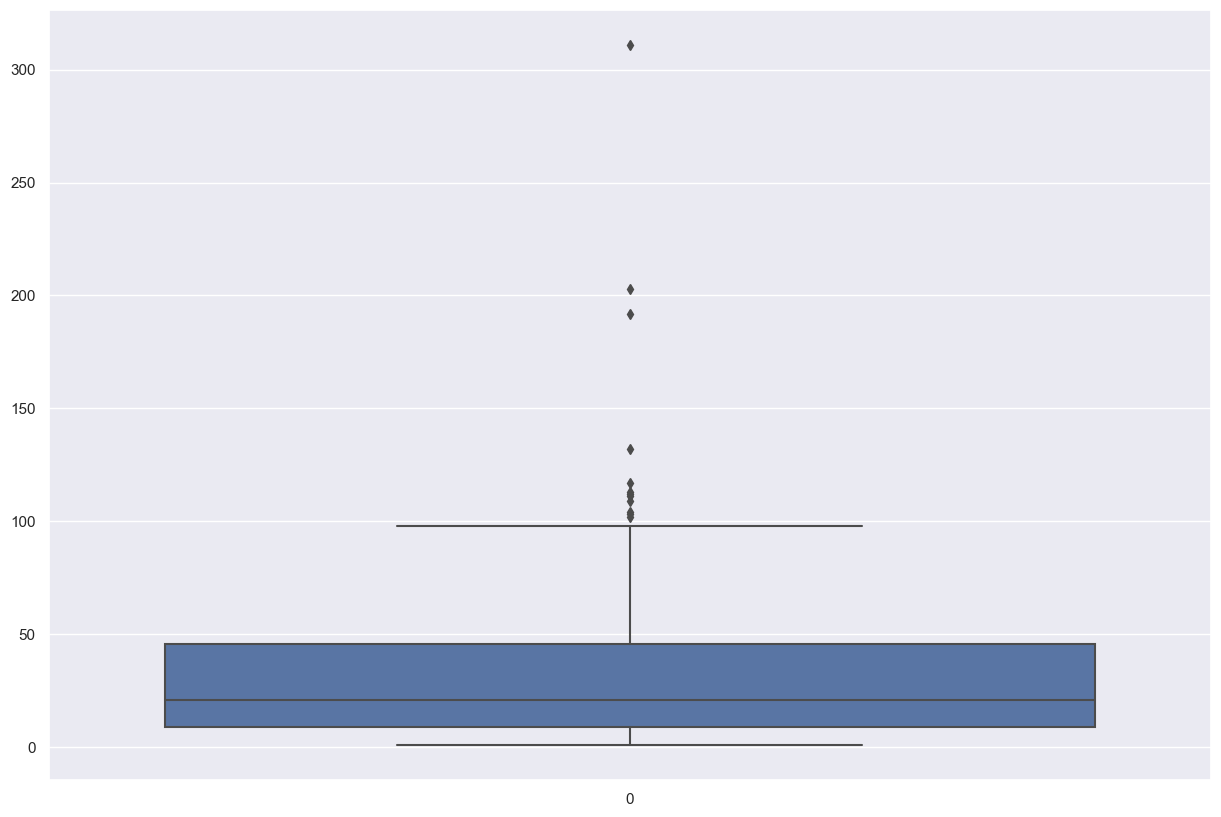

In [95]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(crimes_by_neighbourhoods["TOTAL CRIMES"])

<Axes: xlabel='TOTAL CRIMES', ylabel='Count'>

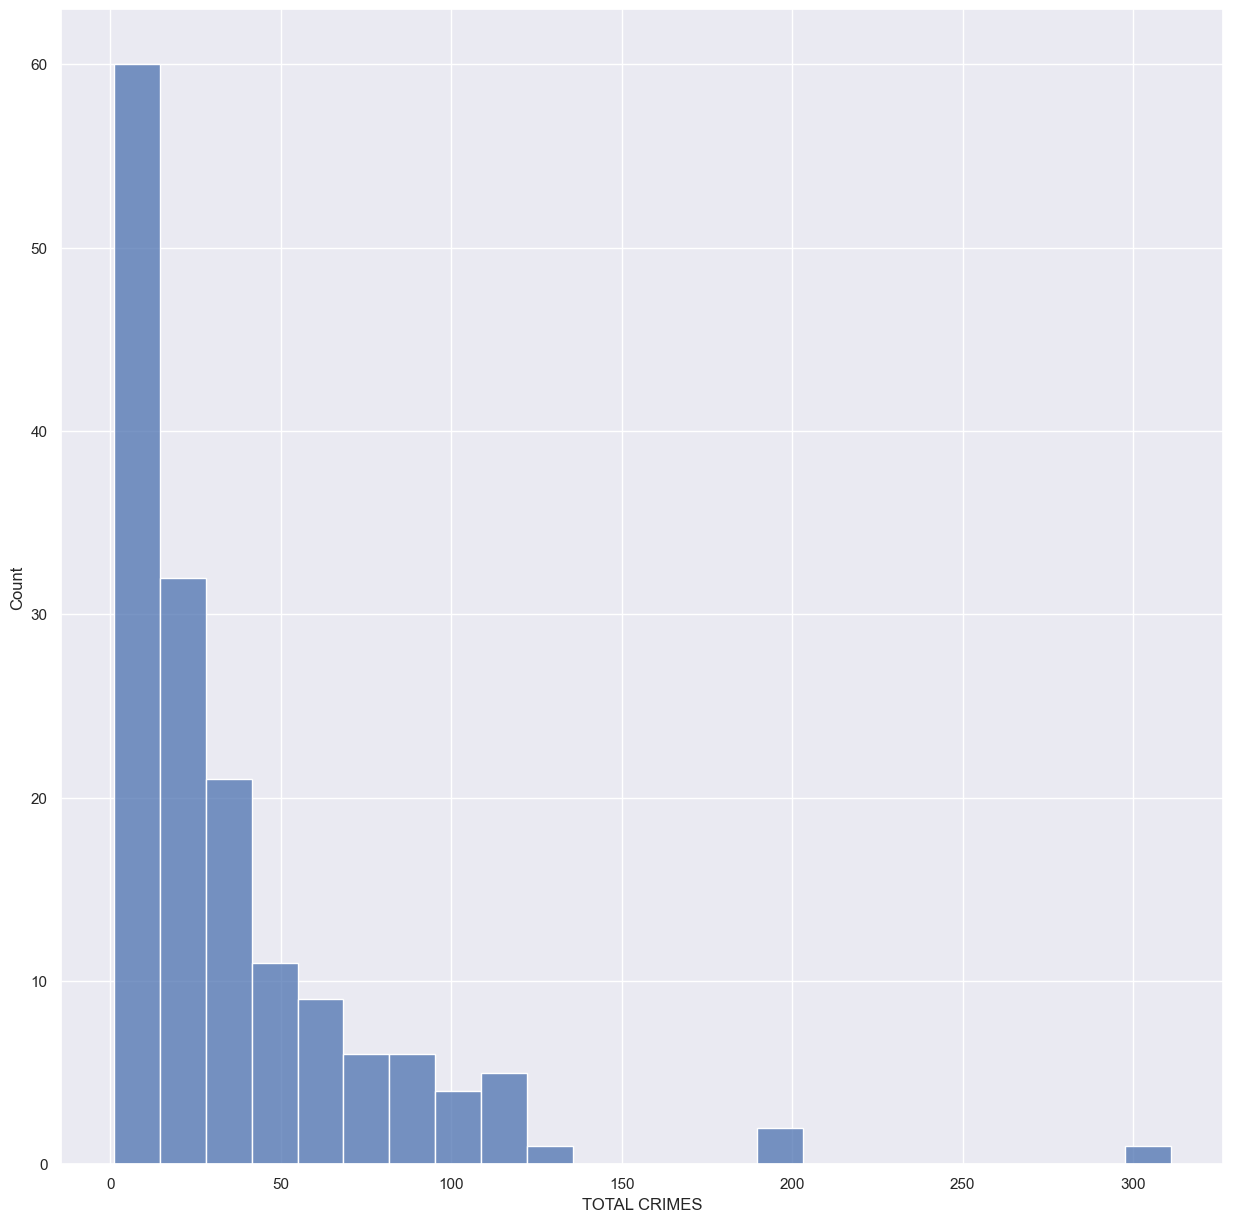

In [96]:
f, ax = plt.subplots(figsize=(15, 15))
sns.histplot(crimes_by_neighbourhoods["TOTAL CRIMES"])

8. Creating a high_crime_neighbourhoods dataframe containing neighborhoods with crimes greater than the 75th percentile (46). Creating a second dataframe called low_crime_neighbourhoods containing neighborhoods with crimes smaller than the 25th percentile (9)

In [97]:
high_crime_neighbourhoods = crimes_by_neighbourhoods[crimes_by_neighbourhoods["TOTAL CRIMES"] > 46].sort_values("TOTAL CRIMES", ascending=False)
low_crime_neighbourhoods = crimes_by_neighbourhoods[crimes_by_neighbourhoods["TOTAL CRIMES"] < 10].sort_values("TOTAL CRIMES", ascending=False)

In [98]:
high_crime_neighbourhoods

,NEIGHBOURHOOD_158,TOTAL CRIMES
0,Glenfield-Jane Heights,311
1,Black Creek,203
2,Mount Olive-Silverstone-Jamestown,192
3,West Humber-Clairville,132
4,York University Heights,117
5,Yorkdale-Glen Park,113
6,Malvern East,112
7,Englemount-Lawrence,111
8,Regent Park,109
9,Humber Summit,104


In [99]:
low_crime_neighbourhoods

,NEIGHBOURHOOD_158,TOTAL CRIMES
116,Caledonia-Fairbank,9
119,University,9
120,Steeles,9
117,Playter Estates-Danforth,9
118,Bedford Park-Nortown,9
121,North Riverdale,8
122,Princess-Rosethorn,8
123,Danforth East York,8
124,St.Andrew-Windfields,8
125,Rosedale-Moore Park,8


# 9. Plotting barplots for high crime neighborhoods and low crime neighborhoods

<Axes: xlabel='TOTAL CRIMES', ylabel='NEIGHBOURHOOD_158'>

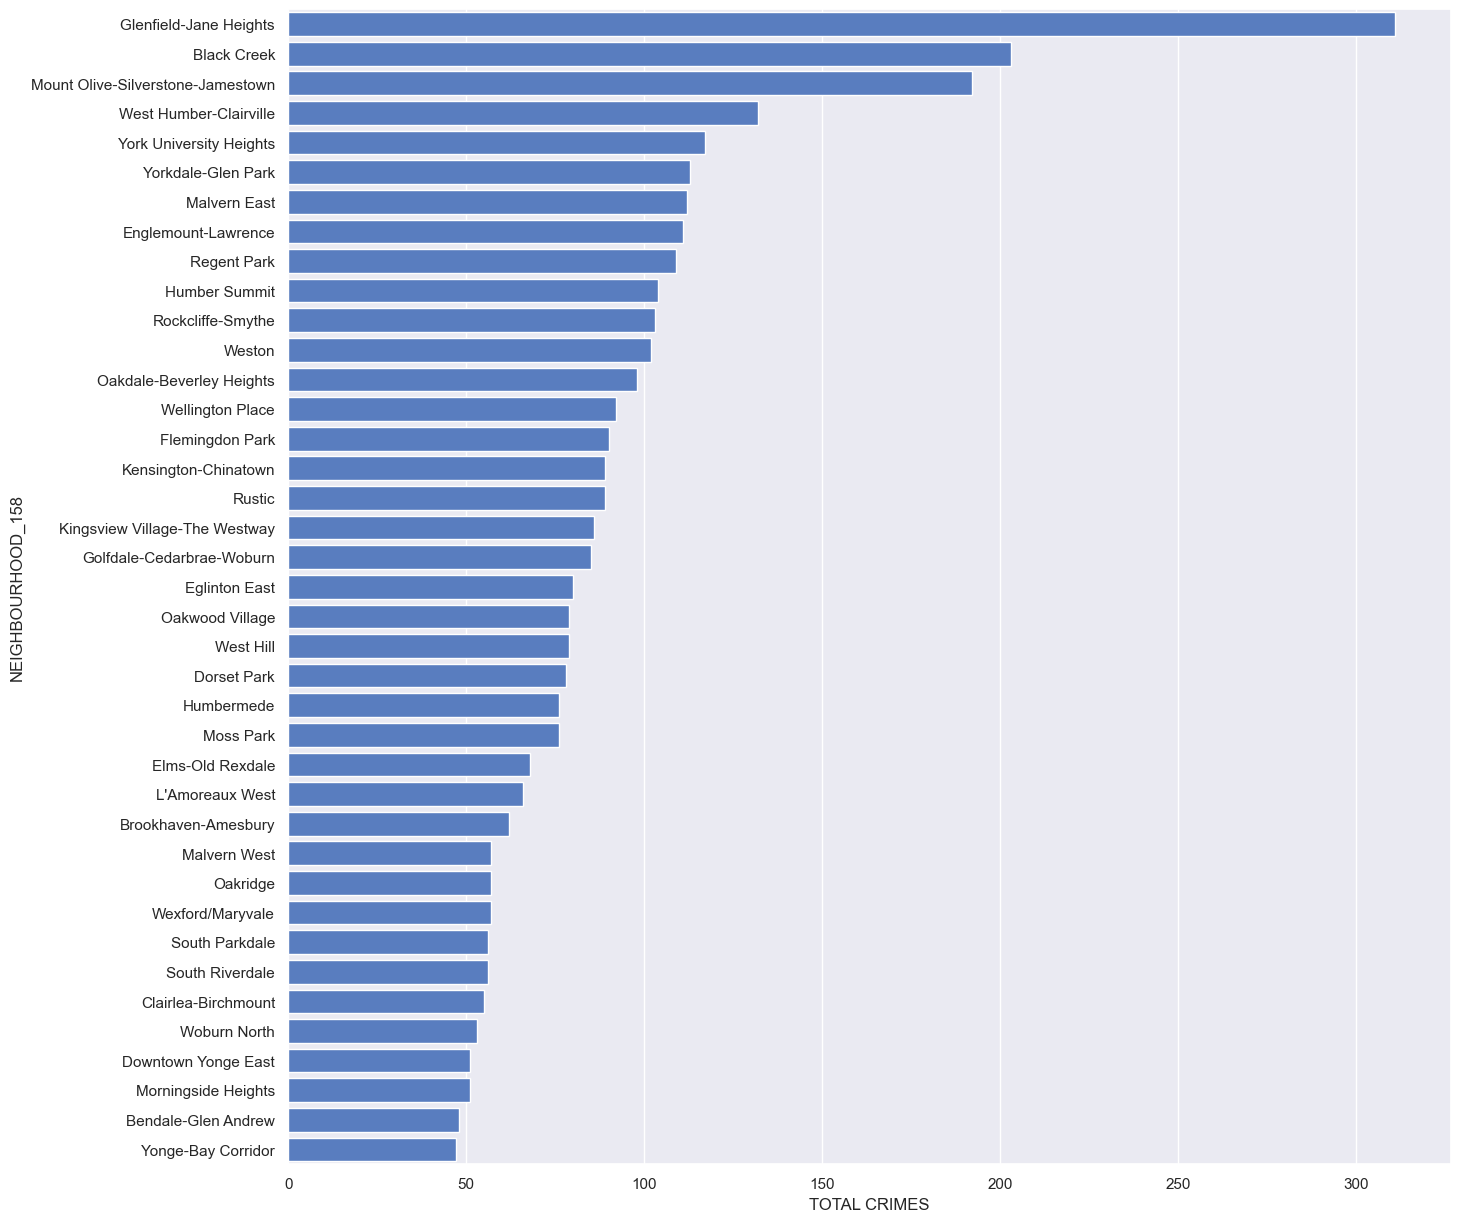

In [100]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(x="TOTAL CRIMES", y="NEIGHBOURHOOD_158", data=high_crime_neighbourhoods,
            label="CRIMES VS NEIGHBOURHOOD" , color="b")

<Axes: xlabel='TOTAL CRIMES', ylabel='NEIGHBOURHOOD_158'>

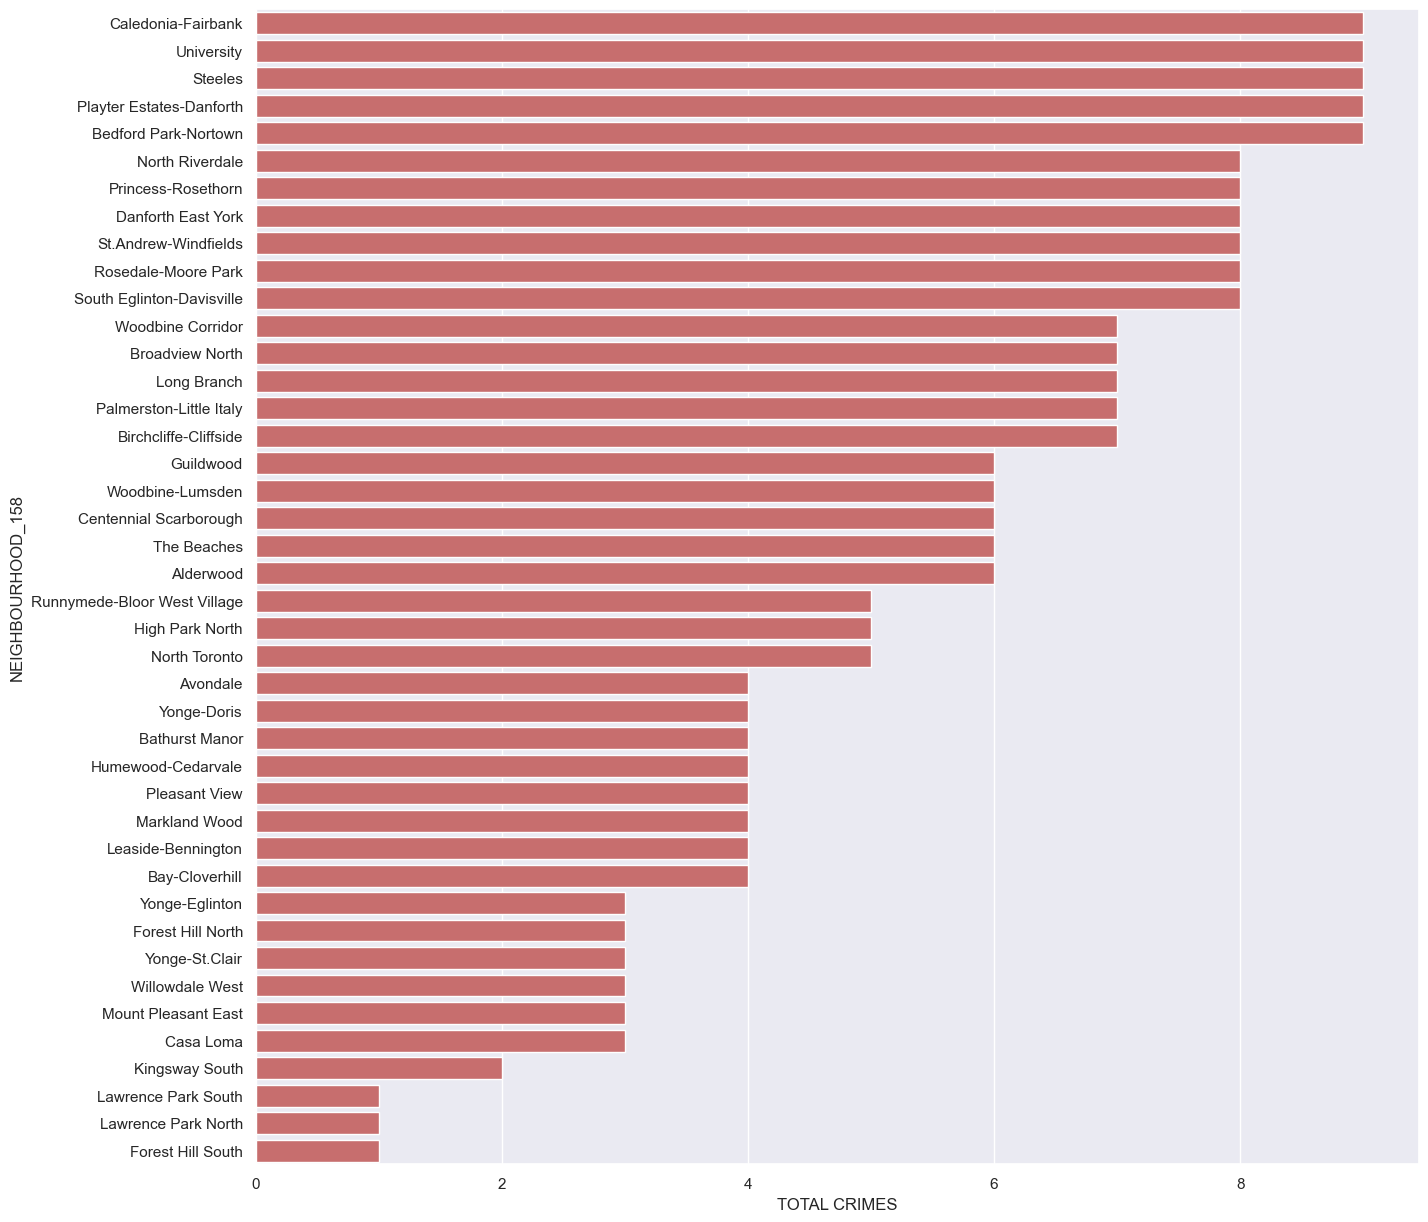

In [101]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(x="TOTAL CRIMES", y="NEIGHBOURHOOD_158", data=low_crime_neighbourhoods,
            label="CRIMES VS NEIGHBOURHOOD" , color="r")

# 10. Retrieve list of neighborhoods present in the high crime and low crime neighborhoods dataframes respectively. 

In [102]:
high_crime_neighbourhoods_list = high_crime_neighbourhoods["NEIGHBOURHOOD_158"].values
low_crime_neighbourhoods_list = low_crime_neighbourhoods["NEIGHBOURHOOD_158"].values


11. Filter the original dataframe to only have rows with high crime neighbourhoods and store the new dataframe in df3 variable, and only rows with low crime neighbourhoods and store that dataframe in df4 varialbe

In [103]:

df3 = df2[df2["NEIGHBOURHOOD_158"].isin(high_crime_neighbourhoods_list)]
df4 = df2[df2["NEIGHBOURHOOD_158"].isin(low_crime_neighbourhoods_list)]

df4

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
102,103,GO-2004150454,2004/01/19 05:00:00+00,2004,January,Monday,19,10,Morning,D54,0,0,59,Danforth East York,59,Danforth East York (59)
122,123,GO-2004432295,2004/07/10 04:00:00+00,2004,July,Saturday,10,16,Afternoon,D11,0,0,89,Runnymede-Bloor West Village,89,Runnymede-Bloor West Village (89)
138,139,GO-2004861470,2004/12/29 05:00:00+00,2004,December,Wednesday,29,23,Evening,D32,0,0,40,St.Andrew-Windfields,40,St.Andrew-Windfields (40)
147,148,GO-2004195761,2004/02/21 05:00:00+00,2004,February,Saturday,21,11,Morning,D53,0,0,173,North Toronto,104,Mount Pleasant West (104)
162,163,GO-2004774602,2004/12/30 05:00:00+00,2004,December,Thursday,30,20,Evening,D11,0,0,88,High Park North,88,High Park North (88)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,5641,GO-20222061220,2022/10/22 04:00:00+00,2022,October,Saturday,22,0,Night,D13,0,0,96,Casa Loma,96,Casa Loma (96)
5655,5656,GO-2022151149,2022/01/23 05:00:00+00,2022,January,Sunday,23,21,Evening,D53,1,0,100,Yonge-Eglinton,100,Yonge-Eglinton (100)
5683,5684,GO-20221294476,2022/07/07 04:00:00+00,2022,July,Thursday,7,18,Evening,D55,1,0,64,Woodbine Corridor,64,Woodbine Corridor (64)
5686,5687,GO-2022512538,2022/03/19 04:00:00+00,2022,March,Saturday,19,4,Night,D13,0,0,106,Humewood-Cedarvale,106,Humewood-Cedarvale (106)


12. Grouping the new df3 and df4 by neighbourhood and by year. The goal is to examine how occurence of crimes in those neighborhoods throughout the years

In [104]:
high_crime_neighbourhoods_grouped_by_year = df3.groupby(["NEIGHBOURHOOD_158", "OCC_YEAR"])["EVENT_UNIQUE_ID"].count().reset_index().sort_values(by = ["OCC_YEAR", "EVENT_UNIQUE_ID"], ascending=[True, False])
high_crime_neighbourhoods_grouped_by_year.rename(columns={'EVENT_UNIQUE_ID': 'TOTAL CRIMES'}, inplace=True)

low_crime_neighbourhoods_grouped_by_year = df4.groupby(["NEIGHBOURHOOD_158", "OCC_YEAR"])["EVENT_UNIQUE_ID"].count().reset_index().sort_values(by = ["OCC_YEAR", "EVENT_UNIQUE_ID"], ascending=[True, False])
low_crime_neighbourhoods_grouped_by_year.rename(columns={'EVENT_UNIQUE_ID': 'TOTAL CRIMES'}, inplace=True)

low_crime_neighbourhoods_grouped_by_year


,NEIGHBOURHOOD_158,OCC_YEAR,TOTAL CRIMES
50,Danforth East York,2004,1
67,High Park North,2004,1
99,North Toronto,2004,1
133,Runnymede-Bloor West Village,2004,1
146,St.Andrew-Windfields,2004,1
...,...,...,...
125,Princess-Rosethorn,2022,1
132,Rosedale-Moore Park,2022,1
145,South Eglinton-Davisville,2022,1
177,Woodbine Corridor,2022,1


In [105]:
high_crime_neighbourhoods_grouped_by_year

,NEIGHBOURHOOD_158,OCC_YEAR,TOTAL CRIMES
378,Mount Olive-Silverstone-Jamestown,2004,9
17,Black Creek,2004,7
575,West Humber-Clairville,2004,7
594,Weston,2004,7
303,Malvern East,2004,6
...,...,...,...
176,Flemingdon Park,2022,1
284,Kingsview Village-The Westway,2022,1
430,Oakridge,2022,1
504,Rustic,2022,1


13. Retrieve a sample of df4 to take closer look at the crime fluctuation throughout the years. top5_neighborhoods contains the top 5 neighbourhoods in the high crime neighbourhoods pool and bottom5_neighbourhoods the lowest 5. Same process done for the low crime neighbourhoods with low_crime_top5_neighbourhoods and low_crime_bottom5_neighbourhoods

In [106]:

top5_neighbourhoods = high_crime_neighbourhoods_grouped_by_year[high_crime_neighbourhoods_grouped_by_year["NEIGHBOURHOOD_158"].isin(high_crime_neighbourhoods["NEIGHBOURHOOD_158"].head(5))]
bottom5_neighbourhoods = high_crime_neighbourhoods_grouped_by_year[high_crime_neighbourhoods_grouped_by_year["NEIGHBOURHOOD_158"].isin(high_crime_neighbourhoods["NEIGHBOURHOOD_158"].tail(5))]

low_crime_top5_neighbourhoods = low_crime_neighbourhoods_grouped_by_year[low_crime_neighbourhoods_grouped_by_year["NEIGHBOURHOOD_158"].isin(low_crime_neighbourhoods["NEIGHBOURHOOD_158"].head(5))]
low_crime_bottom5_neighbourhoods = low_crime_neighbourhoods_grouped_by_year[low_crime_neighbourhoods_grouped_by_year["NEIGHBOURHOOD_158"].isin(low_crime_neighbourhoods["NEIGHBOURHOOD_158"].tail(5))]


14. Identified the 25th percentile and the 75th percentile of the crimes by neighborhood and by year

In [107]:
grouped_by_year_and_crime_occ = df2.groupby(["NEIGHBOURHOOD_158", "OCC_YEAR"])["EVENT_UNIQUE_ID"].count().reset_index().sort_values(by = ["OCC_YEAR", "EVENT_UNIQUE_ID"], ascending=[True, False])
grouped_by_year_and_crime_occ.describe(include="all")

,NEIGHBOURHOOD_158,OCC_YEAR,EVENT_UNIQUE_ID
count,1818,1818.000000,1818.000000
unique,158,NaN,NaN
top,Mount Olive-Silverstone-Jamestown,NaN,NaN
freq,19,NaN,NaN
mean,NaN,2013.713971,3.102860
std,NaN,5.555507,3.128487
min,NaN,2004.000000,1.000000
25%,NaN,2009.000000,1.000000
50%,NaN,2014.000000,2.000000
75%,NaN,2019.000000,4.000000


15. Plot Top 5 and bottom 5 of the high crime neighbourhoods

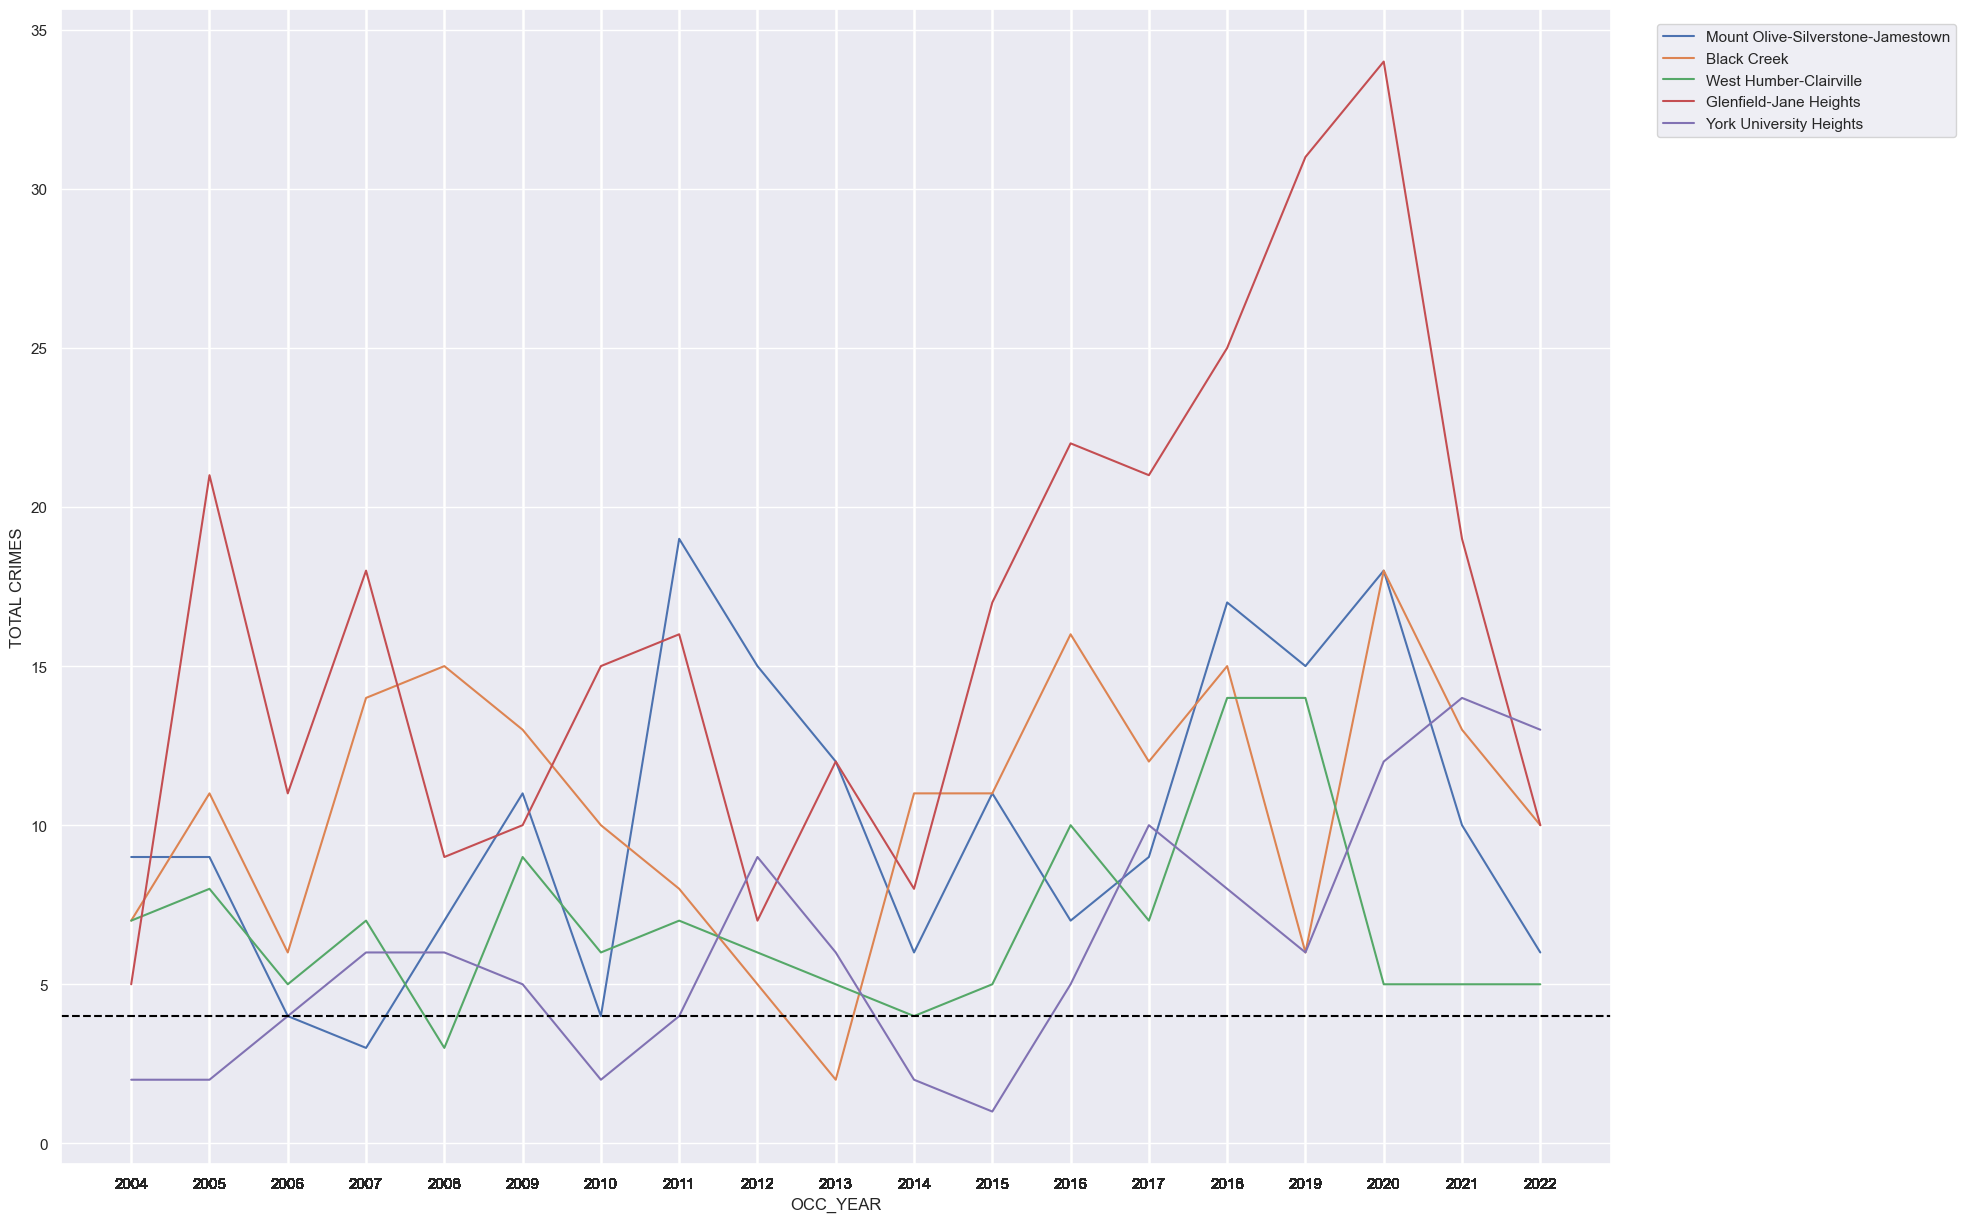

In [108]:

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 15))


sns.set_color_codes("muted")
sns.lineplot(data=top5_neighbourhoods, x='OCC_YEAR', y='TOTAL CRIMES', hue='NEIGHBOURHOOD_158')
plt.xticks(df['OCC_YEAR'])
plt.axhline(y=4, color='black', linestyle='--')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)

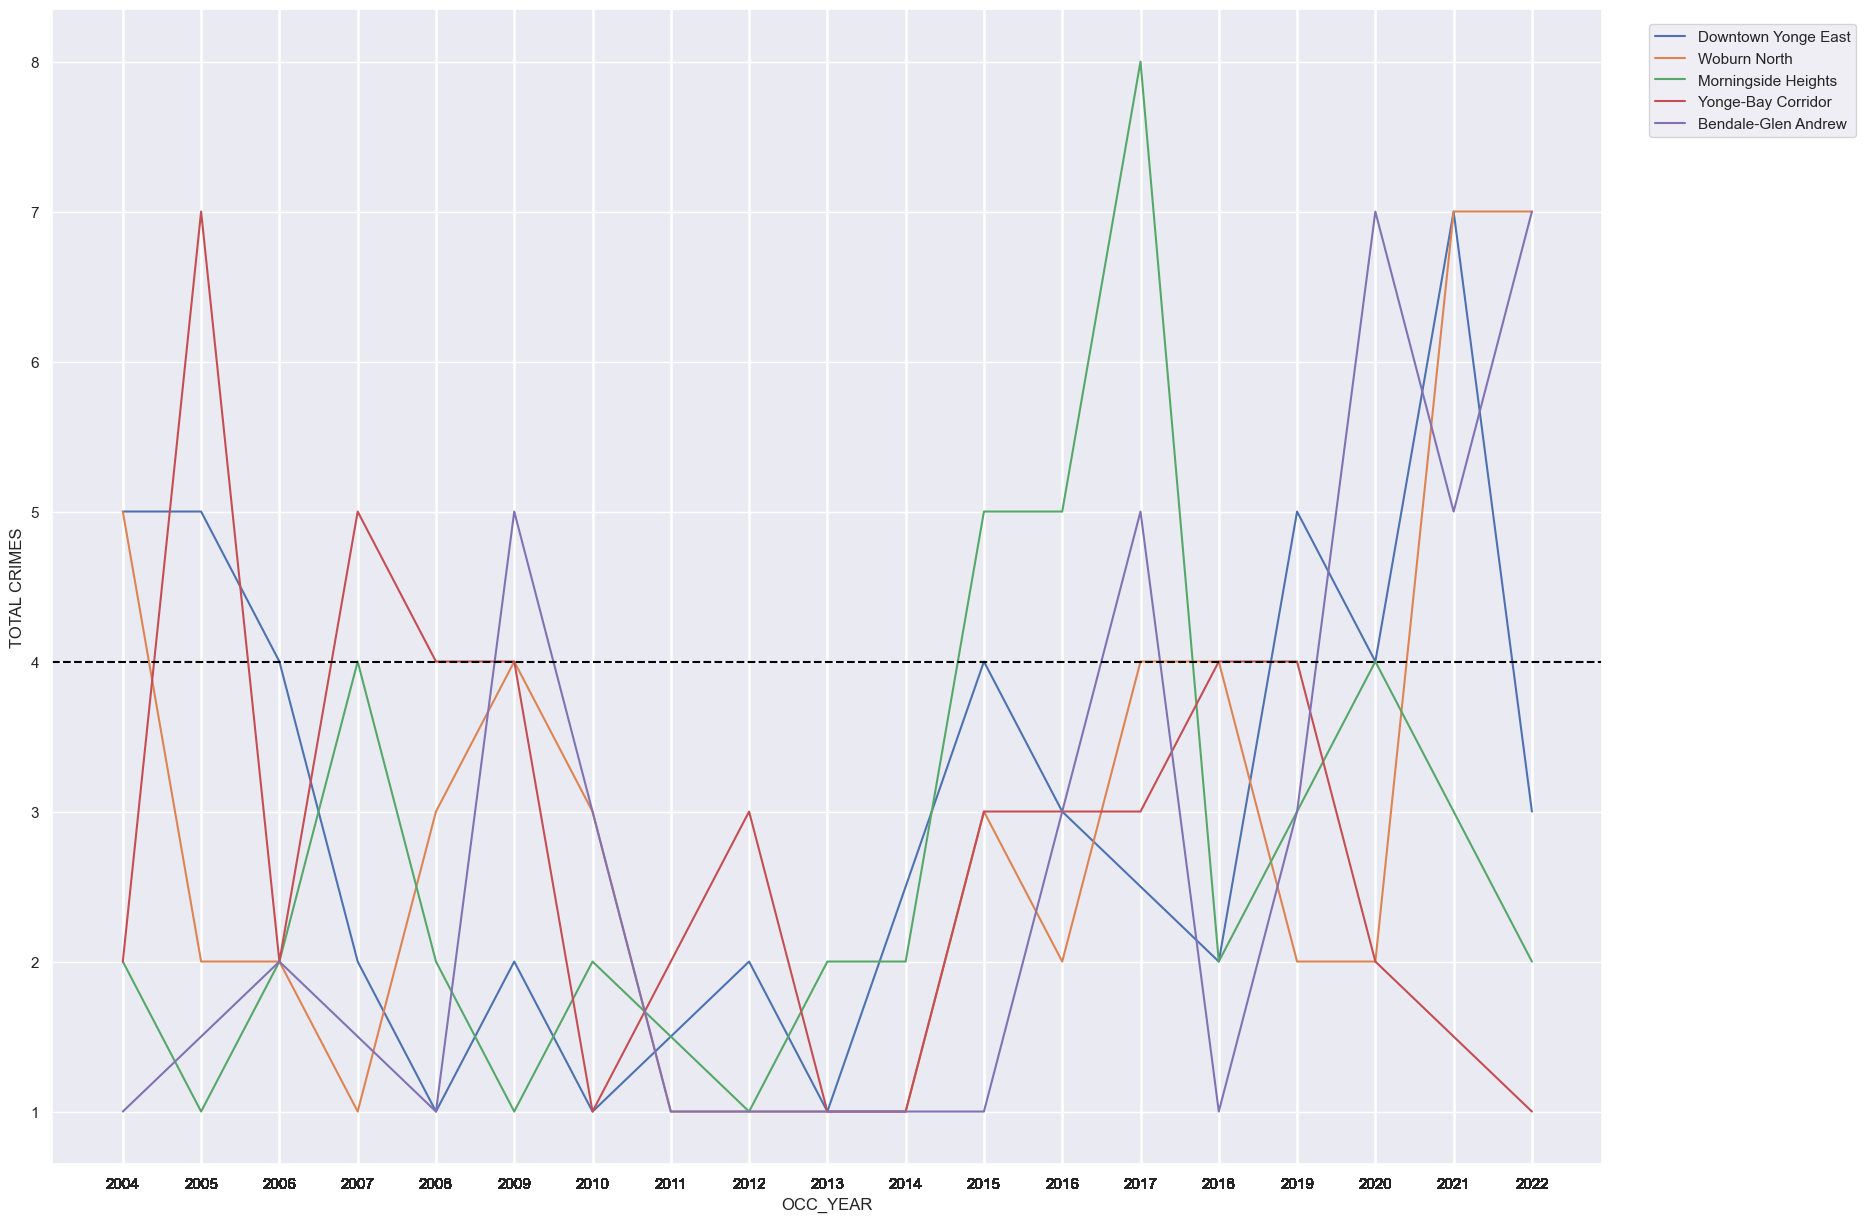

In [109]:
#Lower 5 of the high crime neighbourhoods

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 15))


sns.set_color_codes("muted")
sns.lineplot(data=bottom5_neighbourhoods, x='OCC_YEAR', y='TOTAL CRIMES', hue='NEIGHBOURHOOD_158')
plt.xticks(df['OCC_YEAR'])
plt.axhline(y=4, color='black', linestyle='--')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)

15. Plot Top 5 and bottom 5 of the low crime neighbourhoods

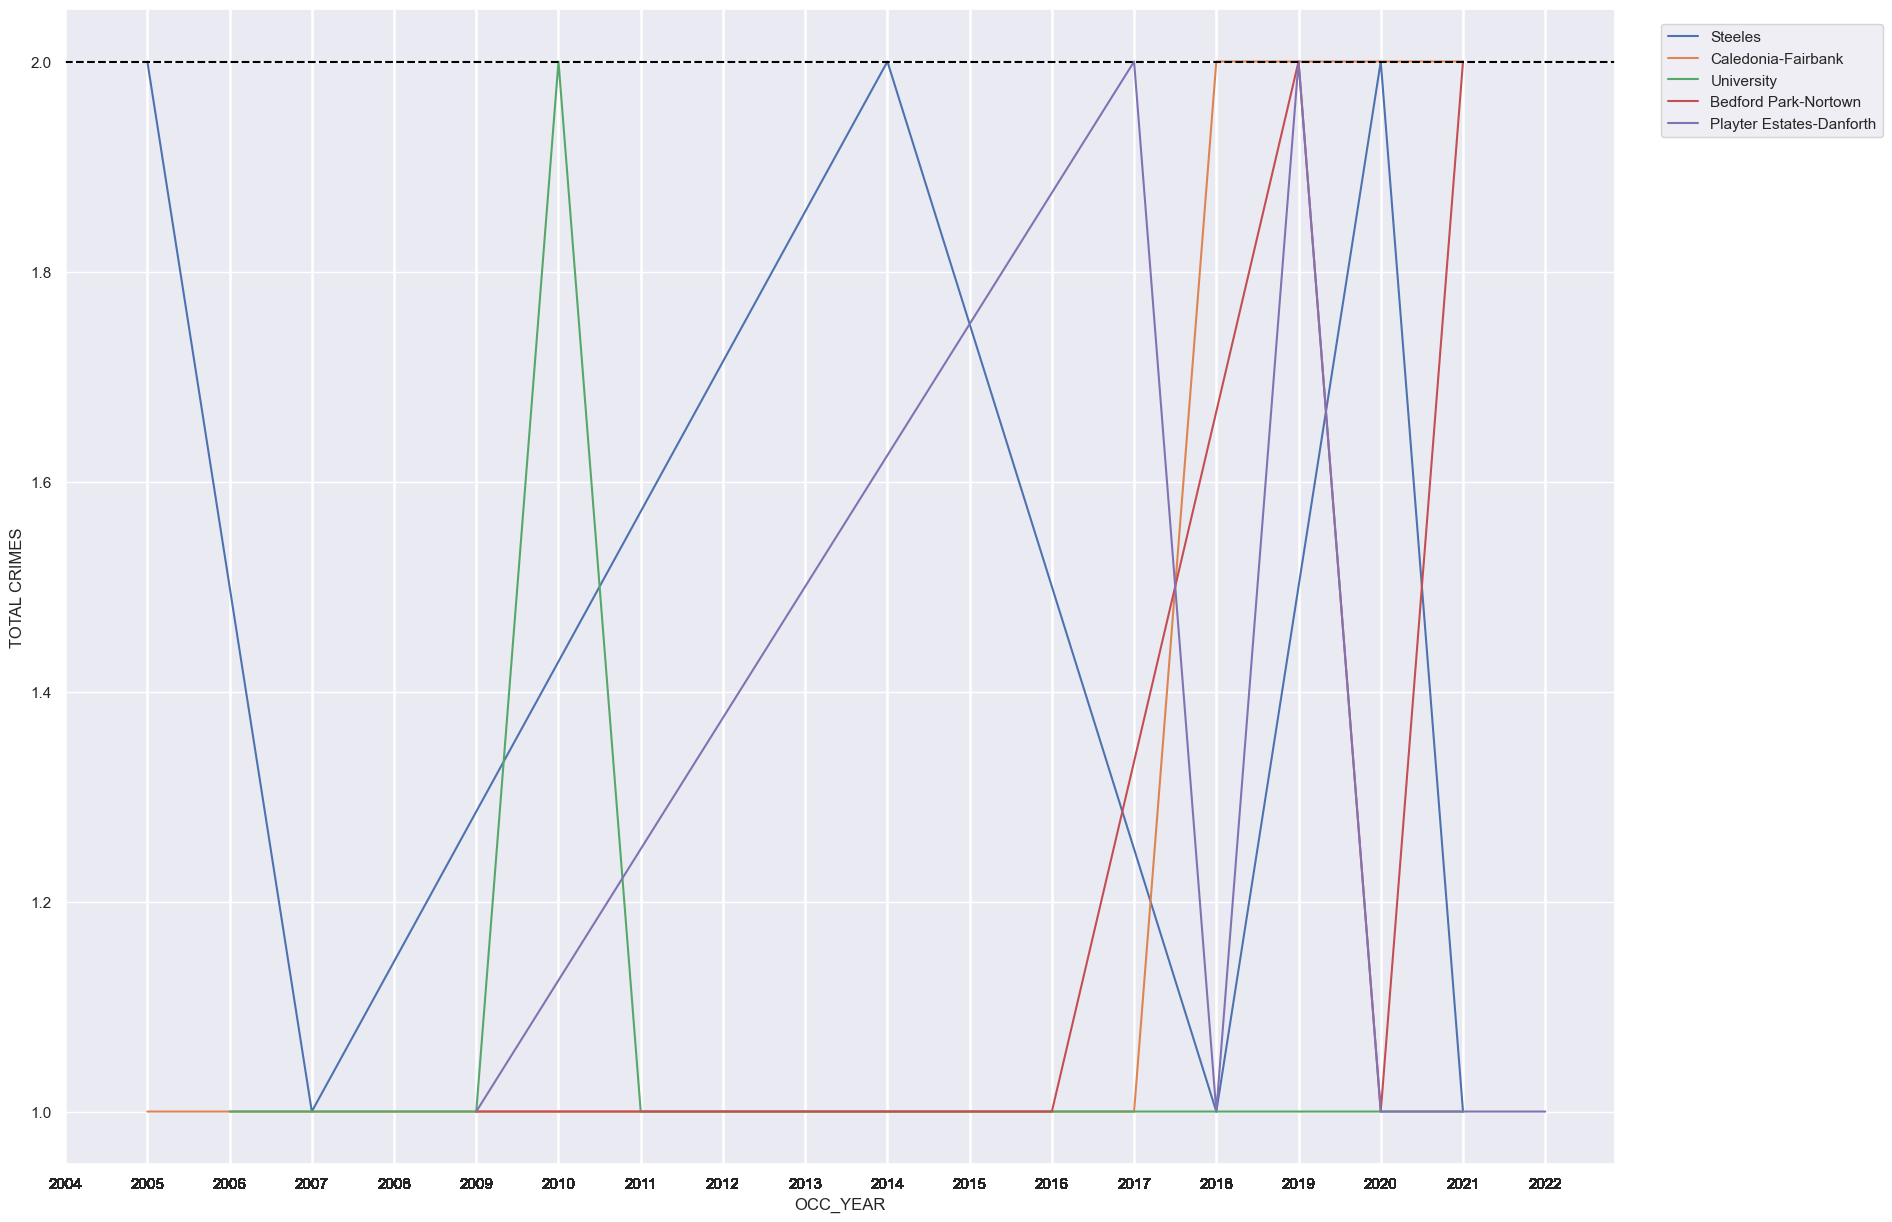

In [110]:
#Top 5 of the high crime neighbourhoods
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 15))


sns.set_color_codes("muted")
sns.lineplot(data=low_crime_top5_neighbourhoods, x='OCC_YEAR', y='TOTAL CRIMES', hue='NEIGHBOURHOOD_158')
plt.xticks(df['OCC_YEAR'])
plt.axhline(y=2, color='black', linestyle='--')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)

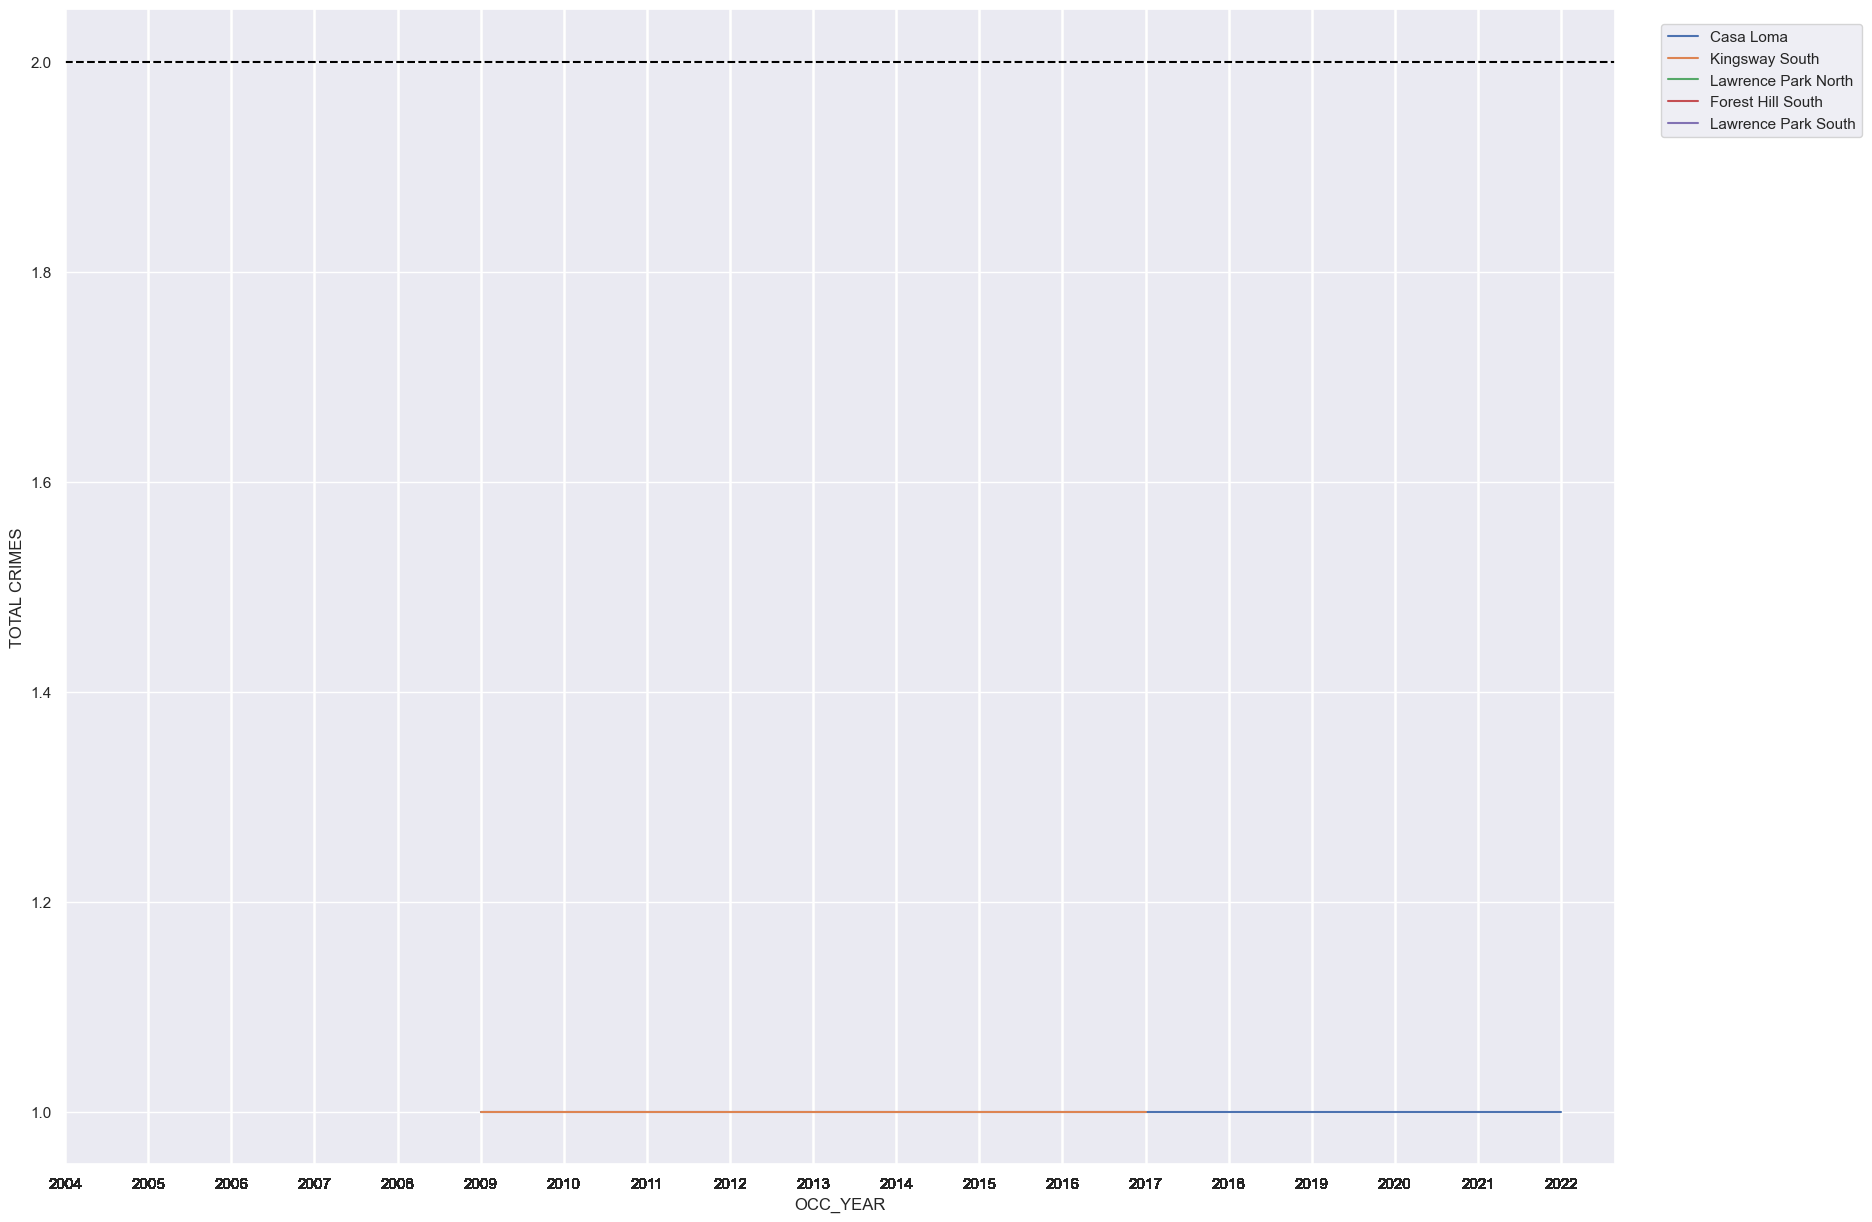

In [111]:
#botton 5 of the low crime neighbourhoods
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 15))


sns.set_color_codes("muted")
sns.lineplot(data=low_crime_bottom5_neighbourhoods, x='OCC_YEAR', y='TOTAL CRIMES', hue='NEIGHBOURHOOD_158')
plt.xticks(df['OCC_YEAR'])
plt.axhline(y=2, color='black', linestyle='--')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=1)

In [112]:
df4

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
102,103,GO-2004150454,2004/01/19 05:00:00+00,2004,January,Monday,19,10,Morning,D54,0,0,59,Danforth East York,59,Danforth East York (59)
122,123,GO-2004432295,2004/07/10 04:00:00+00,2004,July,Saturday,10,16,Afternoon,D11,0,0,89,Runnymede-Bloor West Village,89,Runnymede-Bloor West Village (89)
138,139,GO-2004861470,2004/12/29 05:00:00+00,2004,December,Wednesday,29,23,Evening,D32,0,0,40,St.Andrew-Windfields,40,St.Andrew-Windfields (40)
147,148,GO-2004195761,2004/02/21 05:00:00+00,2004,February,Saturday,21,11,Morning,D53,0,0,173,North Toronto,104,Mount Pleasant West (104)
162,163,GO-2004774602,2004/12/30 05:00:00+00,2004,December,Thursday,30,20,Evening,D11,0,0,88,High Park North,88,High Park North (88)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,5641,GO-20222061220,2022/10/22 04:00:00+00,2022,October,Saturday,22,0,Night,D13,0,0,96,Casa Loma,96,Casa Loma (96)
5655,5656,GO-2022151149,2022/01/23 05:00:00+00,2022,January,Sunday,23,21,Evening,D53,1,0,100,Yonge-Eglinton,100,Yonge-Eglinton (100)
5683,5684,GO-20221294476,2022/07/07 04:00:00+00,2022,July,Thursday,7,18,Evening,D55,1,0,64,Woodbine Corridor,64,Woodbine Corridor (64)
5686,5687,GO-2022512538,2022/03/19 04:00:00+00,2022,March,Saturday,19,4,Night,D13,0,0,106,Humewood-Cedarvale,106,Humewood-Cedarvale (106)


In [114]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 102 to 5687
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OBJECTID           228 non-null    int64 
 1   EVENT_UNIQUE_ID    228 non-null    object
 2   OCC_DATE           228 non-null    object
 3   OCC_YEAR           228 non-null    int64 
 4   OCC_MONTH          228 non-null    object
 5   OCC_DOW            228 non-null    object
 6   OCC_DAY            228 non-null    int64 
 7   OCC_HOUR           228 non-null    int64 
 8   OCC_TIME_RANGE     228 non-null    object
 9   DIVISION           228 non-null    object
 10  DEATH              228 non-null    int64 
 11  INJURIES           228 non-null    int64 
 12  HOOD_158           228 non-null    object
 13  NEIGHBOURHOOD_158  228 non-null    object
 14  HOOD_140           228 non-null    object
 15  NEIGHBOURHOOD_140  228 non-null    object
dtypes: int64(6), object(10)
memory usage: 30.3+ KB

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 0 to 5706
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OBJECTID           5641 non-null   int64 
 1   EVENT_UNIQUE_ID    5641 non-null   object
 2   OCC_DATE           5641 non-null   object
 3   OCC_YEAR           5641 non-null   int64 
 4   OCC_MONTH          5641 non-null   object
 5   OCC_DOW            5641 non-null   object
 6   OCC_DAY            5641 non-null   int64 
 7   OCC_HOUR           5641 non-null   int64 
 8   OCC_TIME_RANGE     5641 non-null   object
 9   DIVISION           5641 non-null   object
 10  DEATH              5641 non-null   int64 
 11  INJURIES           5641 non-null   int64 
 12  HOOD_158           5641 non-null   object
 13  NEIGHBOURHOOD_158  5641 non-null   object
 14  HOOD_140           5641 non-null   object
 15  NEIGHBOURHOOD_140  5641 non-null   object
dtypes: int64(6), object(10)
memory usage: 749.2+ KB

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 0 to 5706
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OBJECTID           5641 non-null   int64 
 1   EVENT_UNIQUE_ID    5641 non-null   object
 2   OCC_DATE           5641 non-null   object
 3   OCC_YEAR           5641 non-null   int64 
 4   OCC_MONTH          5641 non-null   object
 5   OCC_DOW            5641 non-null   object
 6   OCC_DAY            5641 non-null   int64 
 7   OCC_HOUR           5641 non-null   int64 
 8   OCC_TIME_RANGE     5641 non-null   object
 9   DIVISION           5641 non-null   object
 10  DEATH              5641 non-null   int64 
 11  INJURIES           5641 non-null   int64 
 12  HOOD_158           5641 non-null   object
 13  NEIGHBOURHOOD_158  5641 non-null   object
 14  HOOD_140           5641 non-null   object
 15  NEIGHBOURHOOD_140  5641 non-null   object
dtypes: int64(6), object(10)
memory usage: 749.2+ KB

In [118]:
df2.head()

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137)
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1)
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24)
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75)
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132)


In [119]:
df2.drop('OCC_DATE', axis=1, inplace=True)

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5641 entries, 0 to 5706
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OBJECTID           5641 non-null   int64 
 1   EVENT_UNIQUE_ID    5641 non-null   object
 2   OCC_YEAR           5641 non-null   int64 
 3   OCC_MONTH          5641 non-null   object
 4   OCC_DOW            5641 non-null   object
 5   OCC_DAY            5641 non-null   int64 
 6   OCC_HOUR           5641 non-null   int64 
 7   OCC_TIME_RANGE     5641 non-null   object
 8   DIVISION           5641 non-null   object
 9   DEATH              5641 non-null   int64 
 10  INJURIES           5641 non-null   int64 
 11  HOOD_158           5641 non-null   object
 12  NEIGHBOURHOOD_158  5641 non-null   object
 13  HOOD_140           5641 non-null   object
 14  NEIGHBOURHOOD_140  5641 non-null   object
dtypes: int64(6), object(9)
memory usage: 705.1+ KB


In [121]:
columns_to_drop = ['HOOD_140', 'NEIGHBOURHOOD_140']
df2.drop(columns_to_drop, axis=1, inplace=True)

In [132]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3590 entries, 0 to 5706
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   OBJECTID           3590 non-null   int64 
 1   EVENT_UNIQUE_ID    3590 non-null   object
 2   OCC_DATE           3590 non-null   object
 3   OCC_YEAR           3590 non-null   int64 
 4   OCC_MONTH          3590 non-null   object
 5   OCC_DOW            3590 non-null   object
 6   OCC_DAY            3590 non-null   int64 
 7   OCC_HOUR           3590 non-null   int64 
 8   OCC_TIME_RANGE     3590 non-null   object
 9   DIVISION           3590 non-null   object
 10  DEATH              3590 non-null   int64 
 11  INJURIES           3590 non-null   int64 
 12  HOOD_158           3590 non-null   object
 13  NEIGHBOURHOOD_158  3590 non-null   object
 14  HOOD_140           3590 non-null   object
 15  NEIGHBOURHOOD_140  3590 non-null   object
dtypes: int64(6), object(10)
memory usage: 476.8+ KB

In [135]:
df['NEIGHBOURHOOD_158'].nunique()

159

In [136]:
df3['NEIGHBOURHOOD_158'].nunique()

39

In [137]:
df4['NEIGHBOURHOOD_158'].nunique()

42

In [129]:
results = ols("INJURIES ~ OCC_MONTH + OCC_DAY + OCC_TIME_RANGE", data=df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               INJURIES   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.717
Date:                Sat, 15 Jul 2023   Prob (F-statistic):             0.0411
Time:                        19:18:22   Log-Likelihood:                -4383.2
No. Observations:                3590   AIC:                             8798.
Df Residuals:                    3574   BIC:                             8897.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             